In [16]:
import pandas_profiling
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
import statsmodels.api as sm # import statsmodels 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
#https://scikit-learn.org/stable/modules/model_evaluation.html
#todo: add adjusted r2
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score
import catboost as cb
from sklearn.preprocessing import StandardScaler
import pickle


In [2]:
def evalRegressor(model, x_test, y_test):
    y_pred = model.predict(x_test)
    evs = explained_variance_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    #msl = mean_squared_log_error(y_test,y_pred)
    msl = 0
    r2 = r2_score(y_test,y_pred)
    Ar2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    return y_pred,evs,mae,mse,msl,r2,Ar2

In [17]:
df = pd.read_csv('cleanData.csv')

In [18]:
del df['price']

In [19]:
del df['availability_30']
del df['availability_365']
del df['availability_60']
del df['availability_90']
del df['Occupy']

In [20]:
dfNoNA = df.fillna(df.mean())

In [21]:
XNoNA = dfNoNA.drop(['Income_per_month'], axis=1)
yNoNA = dfNoNA['Income_per_month']

In [22]:
X_trainNoNA, X_testNoNA, y_trainNoNA, y_testNoNA = train_test_split(XNoNA, yNoNA)


In [23]:
X = df.drop(['Income_per_month'], axis=1)
y = df['Income_per_month']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [28]:
X_testNoNA.head().to_csv('xtest.csv')

In [13]:
X_trainNoNA.isnull().sum().head()

id              0
accommodates    0
bathrooms       0
bedrooms        0
beds            0
dtype: int64

In [32]:
df.shape[0]

16213

In [11]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)
X_trainNoNA = feature_scaler.fit_transform(X_trainNoNA)
X_testNoNA = feature_scaler.transform(X_testNoNA)

In [15]:
X_testNoNA.head().to_csv('testXhead.csv')

In [29]:
y_testNoNA.head() 
#Random Forest: [6190.75145314 6969.0505859 6190.31933202 8331.28002147 5678.00308136] XGBoost: [1417.1345 2793.7573 2175.4512 2546.1113 1105.9974]

739        75.000000
3508     3150.000000
2042     1964.938272
9311     3281.250000
11649    1378.000000
Name: Income_per_month, dtype: float64

In [21]:
clf = linear_model.Lasso(alpha=0.001,max_iter=1000)
clf.fit(XNoNA, yNoNA)


C:\Users\Elham\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32474003514.04497, tolerance: 12944963.759503001
  positive)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [147]:
l = list(zip(clf.coef_, X.columns)).sort()

In [148]:
print(l)

None


In [104]:
l = list(zip(clf.coef_, X.columns))

In [105]:
l.sort()

In [106]:
df.groupby(['Cooking basics'])['Income_per_month'].agg(['mean','count'])

,mean,count
Cooking basics,,
0,2628.732176,11615
1,3454.116060,4563


In [107]:
df.groupby(['host_neighbourhood_Central Business District'])['Income_per_month'].agg(['mean','count'])

,mean,count
host_neighbourhood_Central Business District,,
0,2769.571880,15639
1,5529.723867,539


In [108]:
df.groupby(['Dishwasher'])['Income_per_month'].agg(['mean','count'])


,mean,count
Dishwasher,,
0,2641.560557,12614
1,3640.070410,3564


In [109]:
df.groupby(['Crib'])['Income_per_month'].agg(['mean','count'])



,mean,count
Crib,,
0,2842.075833,15932
1,4121.559488,246


In [110]:
df['bedrooms'].head()

0    4.000000
1    2.000000
2    1.000000
3    0.111111
4    1.000000
Name: bedrooms, dtype: float64

In [153]:
16213-15872

341

In [14]:
model = sm.OLS(y_trainNoNA, X_trainNoNA).fit() ## sm.OLS(output, input)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Income_per_month   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     37.90
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:14   Log-Likelihood:            -1.0940e+05
No. Observations:               12159   AIC:                         2.195e+05
Df Residuals:                   11825   BIC:                         2.219e+05
Df Model:                         333                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
id                                               -1.188e-05   4.75e-06     -2.500      0.012   -2.12e-05   -2.57e-06
accommodates                                        64.0503     20.212      3.169      0.002      24.431     103.670
bathrooms                                          384.0522     43.651      8.798      0.000     298.489     469.616
bedrooms                                           579.8956     36.422     15.921      0.000     508.502     651.289
beds                                                37.9101     24.735      1.533      0.125     -10.574      86.394
calculated_host_listings_count                     -12.2417      0.985    -12.429      0.000     -14.172     -10.311
calculated_host_listings_count_entire_homes         -3.1073      0.825     -3.767      0.000      -4.724      -1.490
calculated_host_listings_count_private_rooms         4.3583      4.793      0.909      0.363      -5.038      13.754
calculated_host_listings_count_shared_rooms        -20.2765      6.296     -3.221      0.001     -32.617      -7.936
daysToCalenderLastScraped                         -275.5463    198.356     -1.389      0.165    -664.357     113.264
calendar_updated2                                    0.1096      0.166      0.661      0.508      -0.215       0.434
cleaning_fee                                         2.0992      0.510      4.116      0.000       1.099       3.099
extra_people                                        -5.8746      1.082     -5.429      0.000      -7.996      -3.754
daysToFirstreview                                   -0.2571      0.082     -3.140      0.002      -0.418      -0.097
guests_included                                    173.5311     16.879     10.281      0.000     140.446     206.616
host_acceptance_rate                                 2.3204      3.269      0.710      0.478      -4.088       8.729
host_id                                          -1.698e-06   7.14e-07     -2.376      0.017    -3.1e-06   -2.97e-07
host_listings_count                                  4.2948      0.146     29.325      0.000       4.008       4.582
host_response_rate                                   2.4809      2.371      1.046      0.295      -2.166       7.128
daysToHostSince                                     -0.0263      0.055     -0.480      0.631      -0.134       0.081
daysToLastReview                                     0.7437      0.139      5.363      0.000       0.472       1.016
daysToLastScraped                                  121.6342    195.786      0.621      0.534    -262.138     505.406
daysToLastSearched                                -140.1013     43.985     -3.185      0.001    -226.319     -53.883
maximum_maximum_nights                   

In [20]:
feat_importances_LR = pd.Series(model.feature_importances_, index=X_trainNoNA.columns)
feat_importances_LR.nlargest(5).plot(kind='barh')

AttributeError: 'OLSResults' object has no attribute 'feature_importances_'

In [18]:
y_pred_LR,evs_LR,mae_LR,mse_LR,msl_LR,r2_LR,Ar2_LR = evalRegressor(model,X_testNoNA, y_testNoNA)


In [19]:
y_pred_LR,evs_LR,mae_LR,mse_LR,msl_LR,r2_LR,Ar2_LR

(12911    1530.628892
 6763     4023.336765
 6614      783.893904
 12734    2602.004890
 15151    1942.033985
 3622     2645.871648
 2744     1668.881949
 11088    1447.494510
 9572     2787.570955
 11769    1816.359577
 4003     1446.248701
 6567     1342.189152
 5674     1824.233658
 7681     1571.826014
 15296    5019.917645
 11558    2827.500066
 4672     3366.432308
 13587     757.754141
 7009     1478.895637
 12567    1064.879104
 196      1076.582264
 10010    1423.536367
 3852    -1248.343371
 9085     2229.910203
 4129     2140.950150
 16143    5322.098660
 7421     4301.191509
 824      1870.156692
 15856    1439.008290
 2747      195.422462
             ...     
 6682     2575.600544
 4969      639.348673
 8156     2397.580705
 14379     965.261888
 2799     4708.199950
 14115    2063.338217
 2409     5256.060812
 740      1164.681701
 10387    2804.271070
 4651     3324.680710
 7590      761.510880
 3078     1519.836831
 15584    5759.768334
 6412     4295.069747
 1269     

In [16]:
params = {
            'max_depth': [3, None],
            'n_estimators': (50, 100, 200, 400, 600),
            'max_features': (2,4,6,10,15,"sqrt",'log2','auto'),
            'min_samples_leaf': [1,3,5]
        }
estimator=RandomForestRegressor()
Final_CLF_RF = GridSearchCV(estimator=estimator, param_grid=params, cv=10, n_jobs=-1)
Final_CLF_RF.fit(X_trainNoNA, np.ravel(y_trainNoNA))

KeyboardInterrupt: 

In [ ]:
y_pred_RF,evs_RF,mae_RF,mse_RF,msl_RF,r2_RF,Ar2_RF = evalRegressor(Final_CLF_RF,X_testNoNA, y_testNoNA)


In [ ]:
y_pred_RF,evs_RF,mae_RF,mse_RF,msl_RF,r2_RF,Ar2_RF

In [ ]:
feat_importances_RF = pd.Series(Final_CLF_RF.best_estimator_.feature_importances_, index=X_trainNoNA.columns)
feat_importances_RF.nlargest(5).plot(kind='barh')

In [ ]:
coef = pd.Series(Final_CLF_RF.best_estimator_.feature_importances_, index = X_trainNoNA.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

In [ ]:
Final_CLF_RF.best_estimator_

In [ ]:
feat_importances_RF

In [ ]:
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[100],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          #'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':[4]}
estimator=cb.CatBoostRegressor()
Final_CLF_CAT = GridSearchCV(estimator=estimator, param_grid=params, cv=10, n_jobs=-1)
Final_CLF_CAT.fit(X_trainNoNA, np.ravel(y_trainNoNA))

In [ ]:
# params = {'depth':[10],
#           'iterations':[100],
#           'learning_rate':[0.3], 
#           'l2_leaf_reg':[100],
#           'border_count':[200],
#           #'ctr_border_count':[50,5,10,20,100,200],
#           'thread_count':[4]}
# estimator=cb.CatBoostRegressor()
# Final_CLF_CAT = GridSearchCV(estimator=estimator, param_grid=params, cv=3, n_jobs=-1)
# Final_CLF_CAT.fit(X_trainNoNA, np.ravel(y_trainNoNA))

In [ ]:
y_pred_CAT,evs_CAT,mae_CAT,mse_CAT,msl_CAT,r2_CAT,Ar2_CAT = evalRegressor(Final_CLF_CAT,X_testNoNA, y_testNoNA)


In [ ]:
y_pred_CAT,evs_CAT,mae_CAT,mse_CAT,msl_CAT,r2_CAT,Ar2_CAT

In [ ]:
# #RandomForestRegressor with GridSearchCV
# #https://mlfromscratch.com/random-forest-gridsearchcv-python/#/
# def random_forest_prediction(X_train_data,X_test_data,y_output):
#     gs = GridSearchCV(
#         estimator=RandomForestRegressor(),
#         param_grid={
#             'max_depth': [3, None],
#             'n_estimators': (10, 30, 50, 100, 200, 400, 600, 800, 1000),
#             'max_features': (2,4,6)
#         }, cv=10, n_jobs=-1, scoring='neg_mean_squared_error'
#     )
#     model = gs.fit(X_train,y_output)
#     pred = model.predict(X_test_data)
    
#     # Do sqrt(-model.best_score_) for RMSE
#     score = -model.best_score_
    
#     # return all predictions and MSE of all cross validated scores
#     return pred, score
    
# pred,score = random_forest_prediction(X_train,y_train,output_variable)

In [ ]:
# Cross validation without grid serch
# #RandomForestRegressor with 15 fold CV
# #https://www.kaggle.com/dfitzgerald3/randomforestregressor
# scorer = make_scorer(mean_squared_error, False)

# clf = RandomForestRegressor(n_estimators=50, n_jobs=-1)
# cv_score = np.sqrt(-cross_val_score(estimator=clf, X=XNoNA, y=yNoNA, cv=15, scoring = scorer))

# plt.figure(figsize=(10,5))
# plt.bar(range(len(cv_score)), cv_score)
# plt.title('Cross Validation Score')
# plt.ylabel('RMSE')
# plt.xlabel('Iteration')

# plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
# plt.tight_layout()

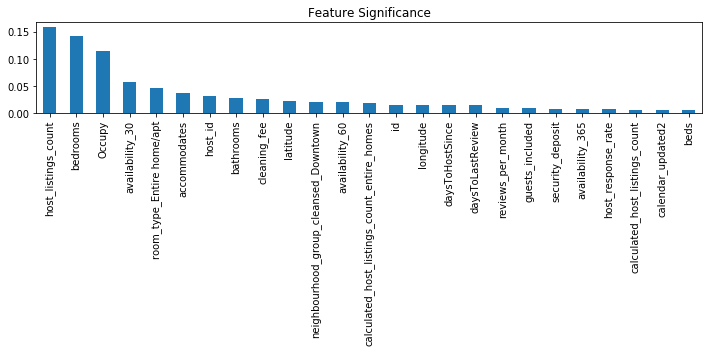

In [30]:
#clf.fit(XNoNA, yNoNA)

# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(clf.feature_importances_, index = XNoNA.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

In [33]:
clf.predict(XNoNA)

array([6024.9706829 , 1992.27282259, 1173.4606552 , ..., 6792.8325    ,
        876.80098531, 2176.14466667])

In [41]:
# No cross validation No grid search
# Simple RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0,
                             n_estimators=100)
regr.fit(XNoNA, yNoNA)  






print(regr.feature_importances_)

l = list(zip(regr.feature_importances_, X.columns))

[0.00000000e+00 0.00000000e+00 6.15299651e-02 1.51856086e-02
 2.51556949e-04 2.76825654e-02 2.64096440e-04 0.00000000e+00
 3.93219490e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.57856129e-01 3.88538518e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.22708929e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [42]:
l

[(0.0, 'Unnamed: 0'),
 (0.0, 'id'),
 (0.06152996508093841, 'accommodates'),
 (0.015185608611336013, 'availability_30'),
 (0.0002515569488861173, 'availability_365'),
 (0.027682565393985864, 'availability_60'),
 (0.00026409644041927734, 'availability_90'),
 (0.0, 'bathrooms'),
 (0.3932194896706364, 'bedrooms'),
 (0.0, 'beds'),
 (0.0, 'calculated_host_listings_count'),
 (0.0, 'calculated_host_listings_count_entire_homes'),
 (0.0, 'calculated_host_listings_count_private_rooms'),
 (0.0, 'calculated_host_listings_count_shared_rooms'),
 (0.0, 'daysToCalenderLastScraped'),
 (0.0, 'calendar_updated2'),
 (0.0, 'cleaning_fee'),
 (0.0, 'extra_people'),
 (0.0, 'daysToFirstreview'),
 (0.0, 'guests_included'),
 (0.0, 'host_acceptance_rate'),
 (0.0, 'host_id'),
 (0.45785612888573957, 'host_listings_count'),
 (0.0003885385183077159, 'host_response_rate'),
 (0.0, 'daysToHostSince'),
 (0.0, 'daysToLastReview'),
 (0.0, 'daysToLastScraped'),
 (0.0, 'daysToLastSearched'),
 (0.0, 'maximum_maximum_nights'),


In [ ]:
#https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
# define base model

params = {
            'epochs': [10,30,100],
            'batch_size': [10, 5, 30]
            
        }

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(X_trainNoNA.shape[1]-1, input_dim=X_trainNoNA.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0,)

Final_CLF_NN = GridSearchCV(estimator=estimator, param_grid=params, cv=10, n_jobs=-1)
Final_CLF_NN.fit(X_trainNoNA, np.ravel(y_trainNoNA))

# kfold = KFold(n_splits=3)
# results = cross_val_score(estimator, X_trainNoNA, y_trainNoNA, cv=kfold)
# print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
y_pred_NN,evs_NN,mae_NN,mse_NN,msl_NN,r2_NN,Ar2_NN = evalRegressor(Final_CLF_NN,X_testNoNA, y_testNoNA)


In [ ]:
y_pred_NN,evs_NN,mae_NN,mse_NN,msl_NN,r2_NN,Ar2_NN

In [ ]:
# # crossvalidation but no gridsearch
# #CatBoostRegressor with 10 fold cross validation

# from catboost import CatBoostRegressor
# def report_cv(model):
#     scores = cross_val_score(model, XNoNA, yNoNA, scoring='neg_mean_absolute_error', cv=10)
#     print('Cross Validation scores: {}'.format(abs(scores)))
#     print('Average score: {}'.format(abs(scores.mean())))
# report_cv(CatBoostRegressor(verbose=False))



In [ ]:
# #change variable names to correct x and y. does it work on null values? does it work on categorical?
# #CatBoostRegressor with Gridsearchcv
# #https://effectiveml.com/using-grid-search-to-optimise-catboost-parameters.html
# params = {'depth':[3,1,2,6,4,5,7,8,9,10],
#           'iterations':[250,100,500,1000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
#           'l2_leaf_reg':[3,1,5,10,100],
#           'border_count':[32,5,10,20,50,100,200],
#           'ctr_border_count':[50,5,10,20,100,200],
#           'thread_count':4}
# def catboost_param_tune(params,train_set,train_label,cat_dims=None,n_splits=3):
#     ps = paramsearch(params)
#     # search 'border_count', 'l2_leaf_reg' etc. individually 
#     #   but 'iterations','learning_rate' together
#     for prms in chain(ps.grid_search(['border_count']),
#                       ps.grid_search(['ctr_border_count']),
#                       ps.grid_search(['l2_leaf_reg']),
#                       ps.grid_search(['iterations','learning_rate']),
#                       ps.grid_search(['depth'])):
#         res = crossvaltest(prms,train_set,train_label,n_splits)
#         # save the crossvalidation result so that future iterations can reuse the best parameters
#         ps.register_result(res,prms)
#         print(res,prms,s'best:',ps.bestscore(),ps.bestparam())
#     return ps.bestparam()

# bestparams = catboost_param_tune(params,train_set,train_label,cat_dims)

In [ ]:
# Final_CLF_CAT = cb.CatBoostClassifier(**bestparams)
# Final_CLF_CAT.fit(X_train, np.ravel(y_train))

In [ ]:
y_pred_RF,evs_RF,mae_RF,mse_RF,msl_RF,r2_RF,Ar2_RF = evalRegressor(Final_CLF_RF,x_test, y_test)
y_pred_CAT,evs_CAT,mae_CAT,mse_CAT,msl_CAT,r2_CAT,Ar2_CAT = evalRegressor(Final_CLF_CAT,x_test, y_test)
y_pred_NN,evs_NN,mae_NN,mse_NN,msl_NN,r2_NN,Ar2_NN = evalRegressor(Final_CLF_NN,x_test, y_test)

In [ ]:
dfNoNA['harvesine_distance'].head()

In [35]:

# save the model to disk
# filename = 'Final_CLF_RF.sav'
# pickle.dump(Final_CLF_RF, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open('Final_CLF_OLS.sav', 'rb'))
result = loaded_model.predict(X_test)
print(result)

[nan nan nan ... nan nan nan]


In [36]:
loaded_model

In [ ]:
# #RandomForestRegressor with GridSearchCV
# #https://mlfromscratch.com/random-forest-gridsearchcv-python/#/
# def random_forest_prediction(X_train_data,X_test_data,y_output):
#     gs = GridSearchCV(
#         estimator=RandomForestRegressor(),
#         param_grid={
#             'max_depth': [3, None],
#             'n_estimators': (10, 30, 50, 100, 200, 400, 600, 800, 1000),
#             'max_features': (2,4,6)
#         }, cv=10, n_jobs=-1, scoring='neg_mean_squared_error'
#     )
#     model = gs.fit(X_train,y_output)
#     pred = model.predict(X_test_data)
    
#     # Do sqrt(-model.best_score_) for RMSE
#     score = -model.best_score_
    
#     # return all predictions and MSE of all cross validated scores
#     return pred, score
    
# pred,score = random_forest_prediction(X_train,y_train,output_variable)